# Walmart Sales Prediction

    #    # Data Wrangling and Analysis/Visualization
    
 We have 3 main datasets in this problem
 a. stores.csv-This file contains anonymized information about the 45 stores, indicating the type and size of store.
 
 b. train.csv-This is the historical training data, which covers to 2010-02-05 to 2012-11-01.\Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week


c. features.csv-This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:
Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
         

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from matplotlib import dates
import datetime as dt
import matplotlib.dates as mdates
import plotly
import cufflinks as cf
cf.go_offline()
import seaborn as sns

In [2]:
features=pd.read_csv('features.csv')

In [3]:
stores=pd.read_csv('stores.csv')

In [4]:
train=pd.read_csv('train.csv')

In [5]:
    features.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106     False  
1        NaN        NaN        NaN  211.242170         8.106      True  
2        NaN        NaN        NaN  211.289143         8.106     False  
3        NaN        NaN        NaN  211.319643         8.106     False  
4        NaN        NaN        NaN  211.350143         8.106     False

In [6]:
stores.head(5)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [7]:
train.head(5)

Store  Dept        Date  Weekly_Sales IsHoliday
0      1     1  2010-02-05      24924.50     False
1      1     1  2010-02-12      46039.49      True
2      1     1  2010-02-19      41595.55     False
3      1     1  2010-02-26      19403.54     False
4      1     1  2010-03-05      21827.90     False

In [8]:
features.info()
# do some standard analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [9]:
features.dtypes
# date is an object. Convert into date type object

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [10]:
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [11]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [12]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [13]:
stores.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [16]:
train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

       # now that i have done some initial analysis on the data, it's time to do some deep dive in cleaning the dataset

#train- no null values
#stores- no null values
#features- has null values

In [17]:
features.isnull().sum()

#shows missing values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
# now I will try to replace the missing values

features=features.replace('NaN','NULL')

In [19]:
features.head(5)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment IsHoliday  
0      NULL      NULL  211.096        8.106     False  
1      NULL      NULL  211.242        8.106      True  
2      NULL      NULL  211.289        8.106     False  
3      NULL      NULL   211.32        8.106     False  
4      NULL      NULL   211.35        8.106     False

In [20]:
# replace True and False with 1 and 0
#features.replace(['FALSE','TRUE'],[0,1],inplace=True)
#string# Integer


In [21]:
features['IsHoliday']=features['IsHoliday'].astype(int)
# replace True and False with 1 and 0. True and False are boolean values



In [22]:
features.head(5)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  
0      NULL      NULL  211.096        8.106          0  
1      NULL      NULL  211.242        8.106          1  
2      NULL      NULL  211.289        8.106          0  
3      NULL      NULL   211.32        8.106          0  
4      NULL      NULL   211.35        8.106          0

In [23]:
clear

In [24]:
# Now lets combine the dataframes


In [25]:
# Combine Stores and Features Dataframe

In [26]:
stores.head(2)

Store Type    Size
0      1    A  151315
1      2    A  202307

In [27]:
features.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  
0      NULL      NULL  211.096        8.106          0  
1      NULL      NULL  211.242        8.106          1

In [28]:
#Merge store and features
store_features=pd.merge(features,stores,on='Store',how='inner')

In [29]:
store_features.head()

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  
0      NULL      NULL  211.096        8.106          0    A  151315  
1      NULL      NULL  211.242        8.106          1    A  151315  
2      NULL      NULL  211.289        8.106          0    A  151315  
3      NULL      NULL   211.32        8.106          0    A  151315  
4      NULL      NULL   211.35        8.106          0    A  151315

In [30]:
train.head(2)

Store  Dept        Date  Weekly_Sales IsHoliday
0      1     1  2010-02-05      24924.50     False
1      1     1  2010-02-12      46039.49      True

In [31]:
    #before merging, replace boolean values with 0 and 1 
train['IsHoliday']=train['IsHoliday'].astype(int)

In [32]:
train.head(2)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50          0
1      1     1  2010-02-12      46039.49          1

In [33]:
# Merge features and train
features_train=pd.merge(features,train,on=['Store','Date','IsHoliday'],how='inner')

In [34]:
features_train.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  
0      NULL      NULL  211.096        8.106          0     1      24924.50  
1      NULL      NULL  211.096        8.106          0     2      50605.27

 Now lets try to classify the values into small categories
Eg: Temperature, FuelPrice, Weekly sales,CPI,Storesize,

I would like to divide Temperature into 4 major categories

Very Cold: < 10 C/< 50 F

Cold: 10-15 C/50-59 F

Cool: 20-25 C/60-77 F

Warm: 26-31 C/78-88 F

Hot: 36-39 C/89-103+ F


Read more: http://www.city-data.com/forum/weather/785422-you-what-degree-numbers-considered-hot-6.html#ixzz4a35RomK8

In [35]:
def function(temp):
    if temp<50:
        return 'very cold'
    elif (temp>50) & (temp<59):
        return 'cold'
    elif (temp>60) & (temp<77):
        return 'cool'
    elif (temp>78) & (temp<88):
        return 'warm'
    else:
        return 'hot'

store_features['New_Temp'] = store_features['Temperature'].apply(function)

In [36]:
store_features['New_Temp'].unique()

array(['very cold', 'cold', 'cool', 'warm', 'hot'], dtype=object)

In [37]:
    store_features.head(3)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size   New_Temp  
0      NULL      NULL  211.096        8.106          0    A  151315  very cold  
1      NULL      NULL  211.242        8.106          1    A  151315  very cold  
2      NULL      NULL  211.289        8.106          0    A  151315  very cold

In [38]:
    features_train['New_Temp'] = features_train['Temperature'].apply(function)

In [39]:
features_train['New_Temp'].unique()

array(['very cold', 'cold', 'cool', 'warm', 'hot'], dtype=object)

In [40]:
features_train.head(4)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
2      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
3      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   
2      NULL      NULL  211.096        8.106          0     3      13740.12   
3      NULL      NULL  211.096        8.106          0     4      39954.04   

    New_Temp  
0  very cold  
1  very cold  
2  very cold  
3  very cold

now lets try to classify fuel price as Low, medium and high


In [41]:
def function(fuel):
    if fuel<2.75:
        return 'low'
    elif (fuel>2.75) & (fuel<=3.12):
        return 'medium'
    else:
        return 'high'

store_features['New_Fuel_Price'] = store_features['Fuel_Price'].apply(function)

In [42]:
store_features.head(5)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   
2      NULL      NULL  211.289        8.106          0    A  151315   
3      NULL      NULL   211.32        8.106          0    A  151315   
4      NULL      NULL   211.35        8.106          0    A  151315   

    New_Temp New_Fuel_Price  
0  very cold            low  
1  very cold            low  
2  very cold            low  
3  very cold            low  
4  very cold            low

In [43]:
def function(fuel):
    if fuel<2.75:
        return 'low'
    elif (fuel>2.75) & (fuel<=3.12):
        return 'medium'
    else:
        return 'high'

features_train['New_Fuel_Price'] = features_train['Fuel_Price'].apply(function)

In [44]:
features_train.head(3)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
2      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   
2      NULL      NULL  211.096        8.106          0     3      13740.12   

    New_Temp New_Fuel_Price  
0  very cold            low  
1  very cold            low  
2  very cold            low

now lets try to classify Weekly sales price as Negative, low, medium, high and very high

In [45]:
def function(sales):
    if sales<0:
        return 'negative'
    elif (sales>0) & (sales<=10000):
        return 'low'
    elif (sales>10000) & (sales<=25000):
        return 'medium'
    elif (sales>25000) & (sales<=100000):
        return 'high'
    else:
        return 'very high'


features_train['New_Weekly_Sales'] = features_train['Weekly_Sales'].apply(function)

In [46]:
features_train.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   

    New_Temp New_Fuel_Price New_Weekly_Sales  
0  very cold            low           medium  
1  very cold            low             high

To visualize the data from a better perspective, lets add some aditional  categorical attributes , including the HOLIDAY week (‘Super Bowl’, ‘Labor Day’, ‘Thanksgiving’, ‘Christmas’). The two weeks before each holiday  as (‘Before Super Bowl’, ‘Before Labor Day’, ‘Before Thanksgiving’, ‘Before Christmas’). 




In [47]:
store_features.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   

    New_Temp New_Fuel_Price  
0  very cold            low  
1  very cold            low

In [48]:
def function(date):
    if date>= '2010-02-01' and date<='2010-02-07':
        return 'SuperBowl Day'
    elif date>='2011-01-31' and date<='2011-02-06':
        return 'SuperBowl Day'
    elif date>='2012-01-30' and date<='2012-02-05':
        return 'SuperBowl Day'
    elif date>='2013-01-28' and date<='2013-02-03':
        return 'SuperBowl Day'
    elif date>='2010-08-31' and date<='2010-09-06':
        return 'Labour Day'
    elif date>='2011-08-30' and date<='2011-09-05':
        return 'Labour Day'
    elif date>='2012-08-28' and date<='2012-09-03':
        return 'Labour Day'
    elif date>='2013-08-27' and date<='2013-09-02':
        return 'Labour Day'
    elif date>='2010-11-18' and date<='2010-11-25':
        return 'Thanksgiving'
    elif date>='2011-11-17' and date<='2011-11-24':
        return 'Thanksgiving'
    elif date>='2012-11-15' and date<='2012-11-22':
        return 'Thanksgiving'
    elif date>='2013-11-21' and date<='2013-11-28':
        return 'Thanksgiving'
    elif date>='2010-12-18' and date<='2010-12-25':
        return 'Christmas'
    elif date>='2011-12-18' and date<='2011-12-25':
        return 'Christmas'
    elif date>='2012-12-18' and date<='2012-12-25':
        return 'Christmas'
    elif date>='2013-12-18' and date<='2013-12-25':
        return 'Christmas'
    elif date>= '2010-01-16' and date<'2010-02-01':
        return 'Before SuperBowl Day'
    elif date>='2011-01-15' and date<'2011-01-31':
        return 'Before SuperBowl Day'
    elif date>='2012-01-14' and date<'2012-01-30':
        return 'Before SuperBowl Day'
    elif date>='2013-01-26' and date<'2013-02-03':
        return 'Before SuperBowl Day'
    elif date>='2010-07-16' and date<'2010-08-31':
        return 'Before Labour Day'
    elif date>='2011-07-15' and date<'2011-08-30':
        return 'Before Labour Day'
    elif date>='2012-08-14' and date<'2012-08-28':
        return 'Before Labour Day'
    elif date>='2013-08-13' and date<'2013-08-27':
        return 'Before Labour Day'
    elif date>='2010-11-04' and date<'2010-11-18':
        return 'Before Thanksgiving'
    elif date>='2011-11-03' and date<'2011-11-17':
        return 'Before Thanksgiving'
    elif date>='2012-11-01' and date<'2012-11-15':
        return 'Before Thanksgiving'
    elif date>='2013-11-07' and date<'2013-11-21':
        return 'Before Thanksgiving'
    elif date>='2010-12-04' and date<'2010-12-18':
        return 'Before Christmas'
    elif date>='2011-12-04' and date<'2011-12-18':
        return 'Before Christmas'
    elif date>='2012-12-04' and date<'2012-12-18':
        return 'Before Christmas'
    elif date>='2013-12-04' and date<'2013-12-18':
        return 'Before Christmas'
    else: 
        return 'Usual Day'
   

    
store_features['Holiday_Type'] = store_features['Date'].apply(function)
features_train['Holiday_Type']=features_train['Date'].apply(function)


In [49]:
store_features.head(10)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   
5      1  2010-03-12        57.79       2.667      NULL      NULL      NULL   
6      1  2010-03-19        54.58       2.720      NULL      NULL      NULL   
7      1  2010-03-26        51.45       2.732      NULL      NULL      NULL   
8      1  2010-04-02        62.27       2.719      NULL      NULL      NULL   
9      1  2010-04-09        65.86       2.770      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   
2      NULL      NULL  211.289        8.106          0    A  151315   
3      NULL      NULL   211.32        8.106          0    A  151315   
4      NULL      NULL   211.35        8.106          0    A  151315   
5      NULL      NULL  211.381        8.106          0    A  151315   
6      NULL      NULL  211.216        8.106          0    A  151315   
7      NULL      NULL  211.018        8.106          0    A  151315   
8      NULL      NULL   210.82        7.808          0    A  151315   
9      NULL      NULL  210.623        7.808          0    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type  
0  very cold            low  SuperBowl Day  
1  very cold            low      Usual Day  
2  very cold            low      Usual Day  
3  very cold            low      Usual Day  
4  very cold            low      Usual Day  
5       cold            low      Usual Day  
6       cold            low      Usual Day  
7       cold            low      Usual Day  
8       cool            low      Usual Day  
9       cool         medium      Usual Day

In [50]:
 store_features['Holiday_Type'].unique()

array(['SuperBowl Day', 'Usual Day', 'Before Labour Day', 'Labour Day',
       'Before Thanksgiving', 'Thanksgiving', 'Before Christmas',
       'Christmas', 'Before SuperBowl Day'], dtype=object)

In [51]:
features_train.head(5)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
2      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
3      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
4      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   
2      NULL      NULL  211.096        8.106          0     3      13740.12   
3      NULL      NULL  211.096        8.106          0     4      39954.04   
4      NULL      NULL  211.096        8.106          0     5      32229.38   

    New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type  
0  very cold            low           medium  SuperBowl Day  
1  very cold            low             high  SuperBowl Day  
2  very cold            low           medium  SuperBowl Day  
3  very cold            low             high  SuperBowl Day  
4  very cold            low             high  SuperBowl Day

In [52]:
 store_features['Holiday_Type'].unique()

array(['SuperBowl Day', 'Usual Day', 'Before Labour Day', 'Labour Day',
       'Before Thanksgiving', 'Thanksgiving', 'Before Christmas',
       'Christmas', 'Before SuperBowl Day'], dtype=object)

Last but not least lets unemployment and CPI into ‘Low’, ‘Medium’ and ‘High’. Store size was categorized to ‘Small’, ‘Medium’ and ‘Large’.



                      WHEN CPI < 159 THEN 'Low'
                      WHEN CPI >= 159 AND UNEMPLOYMENT < 192 THEN 'Medium'
                      WHEN CPI >= 192 THEN 'High'
                      
                
                        WHEN UNEMPLOYMENT < 7 THEN 'Low'
                               WHEN UNEMPLOYMENT >= 7 AND UNEMPLOYMENT < 11 THEN 'Medium'
                               WHEN UNEMPLOYMENT >= 11 THEN 'High'
                            END;
                        STORE_SIZE < 100000 THEN 'Small'
                              WHEN STORE_SIZE >= 100000 AND STORE_SIZE < 200000 THEN 'Medium'
                              WHEN STORE_SIZE >= 200000 THEN 'Large'


In [53]:
def function(CPI):
    if CPI=='NULL':
        return np.NaN
    elif CPI<159:
        return 'low'
    elif CPI >=159 and CPI <192:
        return 'medium'
    elif CPI >=192:
        return 'high'
store_features['new_CPI'] = store_features['CPI'].apply(function)
features_train['new_CPI']=features_train['CPI'].apply(function)

In [54]:
store_features.head()


Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   
2      NULL      NULL  211.289        8.106          0    A  151315   
3      NULL      NULL   211.32        8.106          0    A  151315   
4      NULL      NULL   211.35        8.106          0    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type new_CPI  
0  very cold            low  SuperBowl Day    high  
1  very cold            low      Usual Day    high  
2  very cold            low      Usual Day    high  
3  very cold            low      Usual Day    high  
4  very cold            low      Usual Day    high

In [55]:
features_train.head()

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
2      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
3      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
4      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   
2      NULL      NULL  211.096        8.106          0     3      13740.12   
3      NULL      NULL  211.096        8.106          0     4      39954.04   
4      NULL      NULL  211.096        8.106          0     5      32229.38   

    New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type new_CPI  
0  very cold            low           medium  SuperBowl Day    high  
1  very cold            low             high  SuperBowl Day    high  
2  very cold            low           medium  SuperBowl Day    high  
3  very cold            low             high  SuperBowl Day    high  
4  very cold            low             high  SuperBowl Day    high

In [56]:
store_features['new_CPI'].unique()

array(['high', nan, 'low', 'medium'], dtype=object)

In [57]:
def function(Unemployment):
    if Unemployment=='NULL':
        return np.NaN
    elif Unemployment<7:
        return 'low'
    elif Unemployment >=7 and Unemployment <11:
        return 'medium'
    elif Unemployment >=11:
        return 'high'
store_features['new_unemployment'] = store_features['Unemployment'].apply(function)
features_train['new_unemployment']=features_train['Unemployment'].apply(function)

In [58]:
store_features.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type new_CPI new_unemployment  
0  very cold            low  SuperBowl Day    high           medium  
1  very cold            low      Usual Day    high           medium

In [59]:
features_train.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096        8.106          0     1      24924.50   
1      NULL      NULL  211.096        8.106          0     2      50605.27   

    New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type new_CPI  \
0  very cold            low           medium  SuperBowl Day    high   
1  very cold            low             high  SuperBowl Day    high   

  new_unemployment  
0           medium  
1           medium

In [60]:
def function(Weekly_Sales):
    if Weekly_Sales<10000:
        return 'small'
    elif Weekly_Sales >=10000 and Weekly_Sales <20000:
        return 'medium'
    elif Weekly_Sales >=20000:
        return 'large'
#store_features['new_weekly_sales'] = store_features['Weekly_Sales'].apply(function)
features_train['new_weekly_sales']=features_train['Weekly_Sales'].apply(function)

In [61]:
features_train.head(5)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
2      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
3      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
4      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI       ...        IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096       ...                0     1      24924.50   
1      NULL      NULL  211.096       ...                0     2      50605.27   
2      NULL      NULL  211.096       ...                0     3      13740.12   
3      NULL      NULL  211.096       ...                0     4      39954.04   
4      NULL      NULL  211.096       ...                0     5      32229.38   

    New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type new_CPI  \
0  very cold            low           medium  SuperBowl Day    high   
1  very cold            low             high  SuperBowl Day    high   
2  very cold            low           medium  SuperBowl Day    high   
3  very cold            low             high  SuperBowl Day    high   
4  very cold            low             high  SuperBowl Day    high   

  new_unemployment new_weekly_sales  
0           medium            large  
1           medium            large  
2           medium           medium  
3           medium            large  
4           medium            large  

[5 rows x 21 columns]

In [62]:
# Data Visualization 

In [63]:
# Find top 10 stores by sales

In [64]:
total = features_train.groupby('Store')[['Weekly_Sales']].sum()

# find the 10 largest ethnic groups, by population
total=total.sort( columns='Weekly_Sales', ascending=False).head(10)
#total.reset_index()
total

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08
10     2.716177e+08
27     2.538559e+08
6      2.237561e+08
1      2.224028e+08
39     2.074455e+08

In [65]:
# percent sales contribution of top 10 stores
(total['Weekly_Sales'].sum()/features_train['Weekly_Sales'].sum())*100

39.05053286413233

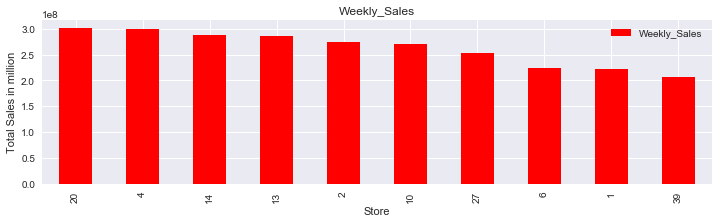

In [66]:
total.plot(kind='bar',subplots=True,alpha=1,color='r',figsize=(12,3))
plt.ylabel('Total Sales in million')
#plt.xticks(total,Store, rotation='vertical')
#plot.xticks(total, x)

#make it wider



The above chart shows the top 10 stores in terms of sales revenue and their percentage contribution to the total sales generated between them. Store 20 was the highest contributor with a total of 301 Million. Together, these 10 stores accounted for 39% of the revenue generated by the given 45 stores.


In [67]:
store_features['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [68]:
store_features.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type new_CPI new_unemployment  
0  very cold            low  SuperBowl Day    high           medium  
1  very cold            low      Usual Day    high           medium

In [69]:
features_train.head(2)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI       ...        IsHoliday  Dept  Weekly_Sales  \
0      NULL      NULL  211.096       ...                0     1      24924.50   
1      NULL      NULL  211.096       ...                0     2      50605.27   

    New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type new_CPI  \
0  very cold            low           medium  SuperBowl Day    high   
1  very cold            low             high  SuperBowl Day    high   

  new_unemployment new_weekly_sales  
0           medium            large  
1           medium            large  

[2 rows x 21 columns]

In [70]:
# Plotting weekly sales vs Date
df=features_train[['Date','Weekly_Sales']].groupby('Date')[['Weekly_Sales']].sum()
#df.reset_index()

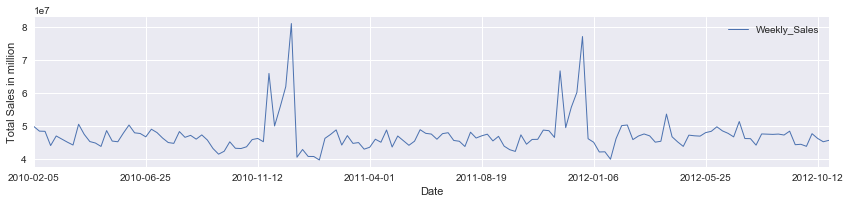

In [71]:
df.plot.line(x=df.index,y='Weekly_Sales',figsize=(12,3),lw=1)
plt.ylabel('Total Sales in million')
plt.tight_layout()

# add cufflinks
# color based on holiday ....


In [72]:
features_train[['Store','Dept','Weekly_Sales']].set_index('Store').groupby(['Dept']).sum().sort('Weekly_Sales',ascending=False).head(10)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



Weekly_Sales
Dept              
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08

In [73]:

temp=features_train.reset_index()
temp.head()

temp[['Store','Dept','Weekly_Sales']].groupby(['Store','Dept']).sum().sort('Weekly_Sales',ascending=False)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



Weekly_Sales
Store Dept              
14    92     26101497.71
2     92     23572153.03
20    92     23542625.04
13    92     23170876.20
4     92     22789210.43
20    95     21537795.62
4     95     21054815.74
27    92     20952094.22
14    95     20655911.35
2     95     20533191.52
10    72     20410926.56
13    95     19568811.27
1     92     19370632.64
31    92     18162446.96
24    92     17429136.57
1     95     17270404.89
27    95     17091275.76
41    92     16563355.96
13    90     16529671.45
19    92     16261990.45
20    38     15759345.93
39    92     15748047.97
10    2      15700726.68
3     38     15529566.07
14    90     15325988.39
31    95     15257530.75
26    38     14800243.10
14    38     14780483.91
39    95     14734256.27
4     72     14477956.47
...                  ...
42    41          -16.00
36    71          -29.00
      36          -30.00
42    55          -43.96
9     47          -55.26
19    19          -67.85
32    47          -84.00
35    19          -97.88
39    19         -106.86
44    71         -123.85
25    48         -152.32
9     80         -155.02
7     47         -158.50
14    47         -186.67
24    47         -188.45
40    47         -241.56
31    47         -303.92
36    72         -304.11
20    47         -378.58
42    71         -467.56
23    47         -551.50
6     47         -756.42
34    47         -947.03
12    47         -965.78
16    47        -1039.08
45    47        -1061.04
42    72        -1209.93
10    47        -2329.00
1     47        -2562.00
35    47        -3567.18

[3331 rows x 1 columns]

Top 10 department sales each year 2010, 2011 and 2012 and the department type A, B or C

In [74]:
#pd.to_datetime(a['Date'])
#to convert to date time

In [75]:
#a.pivot(index=None,columns='Dept',values='Weekly_Sales').reset_index()
#df.pivot(index='foo', columns='bar', values='baz')


In [76]:
features_train.index=pd.to_datetime(features_train.index)


In [77]:
features_train.head(3)

Store        Date  Temperature  Fuel_Price  \
1970-01-01 00:00:00.000000000      1  2010-02-05        42.31       2.572   
1970-01-01 00:00:00.000000001      1  2010-02-05        42.31       2.572   
1970-01-01 00:00:00.000000002      1  2010-02-05        42.31       2.572   

                              MarkDown1 MarkDown2 MarkDown3 MarkDown4  \
1970-01-01 00:00:00.000000000      NULL      NULL      NULL      NULL   
1970-01-01 00:00:00.000000001      NULL      NULL      NULL      NULL   
1970-01-01 00:00:00.000000002      NULL      NULL      NULL      NULL   

                              MarkDown5      CPI       ...        IsHoliday  \
1970-01-01 00:00:00.000000000      NULL  211.096       ...                0   
1970-01-01 00:00:00.000000001      NULL  211.096       ...                0   
1970-01-01 00:00:00.000000002      NULL  211.096       ...                0   

                               Dept  Weekly_Sales   New_Temp New_Fuel_Price  \
1970-01-01 00:00:00.000000000     1      24924.50  very cold            low   
1970-01-01 00:00:00.000000001     2      50605.27  very cold            low   
1970-01-01 00:00:00.000000002     3      13740.12  very cold            low   

                              New_Weekly_Sales   Holiday_Type new_CPI  \
1970-01-01 00:00:00.000000000           medium  SuperBowl Day    high   
1970-01-01 00:00:00.000000001             high  SuperBowl Day    high   
1970-01-01 00:00:00.000000002           medium  SuperBowl Day    high   

                              new_unemployment new_weekly_sales  
1970-01-01 00:00:00.000000000           medium            large  
1970-01-01 00:00:00.000000001           medium            large  
1970-01-01 00:00:00.000000002           medium           medium  

[3 rows x 21 columns]

In [78]:
features_train=features_train.reset_index()

In [79]:
features_train=features_train.set_index(['Date', 'Store','Dept'])

In [80]:
features_train.head()


index  Temperature  Fuel_Price  \
Date       Store Dept                                                          
2010-02-05 1     1    1970-01-01 00:00:00.000000000        42.31       2.572   
                 2    1970-01-01 00:00:00.000000001        42.31       2.572   
                 3    1970-01-01 00:00:00.000000002        42.31       2.572   
                 4    1970-01-01 00:00:00.000000003        42.31       2.572   
                 5    1970-01-01 00:00:00.000000004        42.31       2.572   

                      MarkDown1 MarkDown2 MarkDown3 MarkDown4 MarkDown5  \
Date       Store Dept                                                     
2010-02-05 1     1         NULL      NULL      NULL      NULL      NULL   
                 2         NULL      NULL      NULL      NULL      NULL   
                 3         NULL      NULL      NULL      NULL      NULL   
                 4         NULL      NULL      NULL      NULL      NULL   
                 5         NULL      NULL      NULL      NULL      NULL   

                           CPI Unemployment  IsHoliday  Weekly_Sales  \
Date       Store Dept                                                  
2010-02-05 1     1     211.096        8.106          0      24924.50   
                 2     211.096        8.106          0      50605.27   
                 3     211.096        8.106          0      13740.12   
                 4     211.096        8.106          0      39954.04   
                 5     211.096        8.106          0      32229.38   

                        New_Temp New_Fuel_Price New_Weekly_Sales  \
Date       Store Dept                                              
2010-02-05 1     1     very cold            low           medium   
                 2     very cold            low             high   
                 3     very cold            low           medium   
                 4     very cold            low             high   
                 5     very cold            low             high   

                        Holiday_Type new_CPI new_unemployment new_weekly_sales  
Date       Store Dept                                                           
2010-02-05 1     1     SuperBowl Day    high           medium            large  
                 2     SuperBowl Day    high           medium            large  
                 3     SuperBowl Day    high           medium           medium  
                 4     SuperBowl Day    high           medium            large  
                 5     SuperBowl Day    high           medium            large

In [81]:
del(features_train['index'])

In [82]:
abc=features_train[['Weekly_Sales']].unstack(level=['Dept','Store'])

In [83]:
abc.head()

Weekly_Sales                                                   \
Dept                 1         2         3         4         5        6    
Store                1         1         1         1         1        1    
Date                                                                       
2010-02-05     24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
2010-02-12     46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
2010-02-19     41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   
2010-02-26     19403.54  44292.87  11135.17  34660.16  24101.89  5244.56   
2010-03-05     21827.90  48397.98  12275.58  38086.19  23082.14  4221.25   

                                                   ...                     \
Dept              7         8         9         10 ...        95       97   
Store             1         1         1         1  ...        45       45   
Date                                               ...                      
2010-02-05  21084.08  40129.01  16930.99  30721.50 ...  63833.63  8393.22   
2010-02-12  18310.31  37334.83  16562.49  31494.77 ...  41131.42  5011.36   
2010-02-19  19985.20  38717.60  15880.85  29634.13 ...  47214.80  5703.42   
2010-02-26  17224.22  35318.20  15175.52  27921.96 ...  49982.50  6343.60   
2010-03-05  19659.70  38776.09  24064.70  33299.27 ...  48006.18  5445.80   

                                                         
Dept            98    78     94      47  45  49  77  96  
Store           45    45     45      45  45  45  45  45  
Date                                                     
2010-02-05  347.23   NaN    NaN     NaN NaN NaN NaN NaN  
2010-02-12  553.25  12.0   2.94     NaN NaN NaN NaN NaN  
2010-02-19  281.00  12.0  10.00     NaN NaN NaN NaN NaN  
2010-02-26    2.50  12.0   5.88 -1750.0 NaN NaN NaN NaN  
2010-03-05    4.50   NaN   8.82     NaN NaN NaN NaN NaN  

[5 rows x 3331 columns]

In [84]:
abc[['Weekly_Sales']].sum().sort_values(ascending=False).idxmax(axis='columns')

('Weekly_Sales', 92, 14)

In [85]:
# Department 92 in store 14 has highest sale

In [86]:
abc[['Weekly_Sales']].sum().sort_values(ascending=False)

              Dept  Store
Weekly_Sales  92    14       26101497.71
                    2        23572153.03
                    20       23542625.04
                    13       23170876.20
                    4        22789210.43
              95    20       21537795.62
                    4        21054815.74
              92    27       20952094.22
              95    14       20655911.35
                    2        20533191.52
              72    10       20410926.56
              95    13       19568811.27
              92    1        19370632.64
                    31       18162446.96
                    24       17429136.57
              95    1        17270404.89
                    27       17091275.76
              92    41       16563355.96
              90    13       16529671.45
              92    19       16261990.45
              38    20       15759345.93
              92    39       15748047.97
              2     10       15700726.68
              38    3        15

In [87]:
abc.head(3)


Weekly_Sales                                                   \
Dept                 1         2         3         4         5        6    
Store                1         1         1         1         1        1    
Date                                                                       
2010-02-05     24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
2010-02-12     46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
2010-02-19     41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   

                                                   ...                     \
Dept              7         8         9         10 ...        95       97   
Store             1         1         1         1  ...        45       45   
Date                                               ...                      
2010-02-05  21084.08  40129.01  16930.99  30721.50 ...  63833.63  8393.22   
2010-02-12  18310.31  37334.83  16562.49  31494.77 ...  41131.42  5011.36   
2010-02-19  19985.20  38717.60  15880.85  29634.13 ...  47214.80  5703.42   

                                                     
Dept            98    78     94  47  45  49  77  96  
Store           45    45     45  45  45  45  45  45  
Date                                                 
2010-02-05  347.23   NaN    NaN NaN NaN NaN NaN NaN  
2010-02-12  553.25  12.0   2.94 NaN NaN NaN NaN NaN  
2010-02-19  281.00  12.0  10.00 NaN NaN NaN NaN NaN  

[3 rows x 3331 columns]

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()


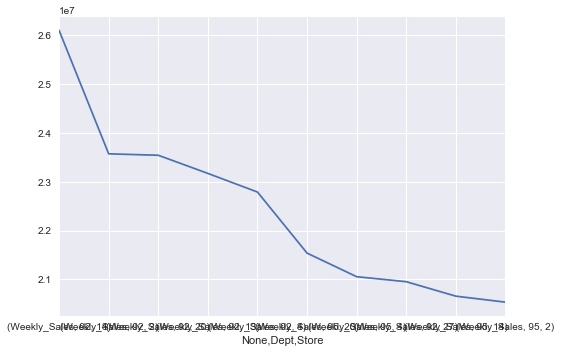

In [88]:
abc[['Weekly_Sales']].sum().sort_values(ascending=False).head(10).plot()


# look at some plots
boxplot(Weekly_Sales~Type)
boxplot(Weekly_Sales~Temperature>70)
hist(Temperature)
plot(CPI,Fuel_Price)
hist(Size)
hist(log(Weekly_Sales)

In [89]:
abc.dropna(how='all')

Weekly_Sales                                                   \
Dept                 1         2         3         4         5        6    
Store                1         1         1         1         1        1    
Date                                                                       
2010-02-05     24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
2010-02-12     46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
2010-02-19     41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   
2010-02-26     19403.54  44292.87  11135.17  34660.16  24101.89  5244.56   
2010-03-05     21827.90  48397.98  12275.58  38086.19  23082.14  4221.25   
2010-03-12     21043.39  43751.94  10123.45  32668.67  21498.92  5619.00   
2010-03-19     22136.64  43615.49   9001.37  34118.11  22632.57  4906.05   
2010-03-26     26229.21  41892.55  10366.85  33872.07  38971.89  7468.33   
2010-04-02     57258.43  47450.50  11157.08  37809.49  29967.92  4132.61   
2010-04-09     42960.91  46549.73  10179.29  36174.43  18516.45  4428.80   
2010-04-16     17596.96  45025.02   9226.80  34740.19  11570.27  5020.78   
2010-04-23     16145.35  44418.11   8868.93  33806.71  24763.98  3945.19   
2010-04-30     16555.11  45971.30   9337.44  33437.80  22006.41  4736.15   
2010-05-07     17413.94  47903.01   9372.80  37168.34  19260.44  7477.70   
2010-05-14     18926.74  43675.61   7919.86  33657.70  16891.66  6982.17   
2010-05-21     14773.04  44319.15   7813.91  35571.47  16157.17  3395.75   
2010-05-28     15580.43  44619.52   8412.69  36380.36  15784.60  6165.59   
2010-06-04     17558.09  48754.47   8001.41  40548.19  22932.26  5484.90   
2010-06-11     16637.62  47089.54   7742.75  36579.96  21817.36  4082.04   
2010-06-18     16216.27  44428.71   8201.06  35059.52  19778.44  3902.26   
2010-06-25     16328.72  45299.92   6591.22  34454.69  19054.58  4239.10   
2010-07-02     16333.14  47077.72   7857.88  39773.71  18887.71  4541.91   
2010-07-09     17688.76  46752.12   8112.67  39781.45  20249.54  4986.25   
2010-07-16     17150.84  44339.20  13751.30  35234.66  17918.22  4772.70   
2010-07-23     15360.45  44763.33  16930.62  36624.71  17313.46  5758.04   
2010-07-30     15381.82  45833.77  20915.95  36419.68  16472.48  3932.95   
2010-08-06     17508.41  50031.73  26719.02  40973.88  16926.17  4700.38   
2010-08-13     15536.40  45475.69  30640.54  36461.66  15544.62  3885.01   
2010-08-20     15740.13  49754.17  41101.93  39706.10  15412.44  4067.35   
2010-08-27     15793.87  49623.53  51159.17  36404.60  13570.32  3389.29   
...                 ...       ...       ...       ...       ...      ...   
2012-04-06     57592.12  51805.88   9335.24  42060.21  28386.81  4764.43   
2012-04-13     34684.21  43991.18   7927.73  37449.26  18458.33  4500.12   
2012-04-20     16976.19  45561.85   8647.36  36350.03  16645.01  2988.96   
2012-04-27     16347.60  45456.23   8635.62  36894.54  17170.39  3319.32   
2012-05-04     17147.44  50501.30  10655.35  41897.55  18953.07  4658.18   
2012-05-11     18164.20  46717.76  10342.72  35840.06  17277.63  3574.83   
2012-05-18     18517.79  44411.23   8609.82  34536.29  17955.73  6030.81   
2012-05-25     16963.55  45817.07   8345.33  38270.34  18625.67  5131.26   
2012-06-01     16065.49  47425.29   7175.77  41566.55  17233.25  3249.75   
2012-06-08     17666.00  49439.58   8614.64  41124.27  24752.99  4888.46   
2012-06-15     17558.82  46637.48   8016.26  39019.74  21376.63  4087.58   
2012-06-22     16633.41  46075.00   7301.41  37400.31  24337.24  4870.31   
2012-06-29     15722.82  47629.14   7577.59  39758.77  20233.90  4774.50   
2012-07-06     17823.37  49771.92   8473.71  44936.96  19684.48  2828.03   
2012-07-13     16566.18  44411.95  13126.15  38073.91  18089.61  2776.97   
2012-07-20     16348.06  45108.22  20126.95  38080.05  17896.46  3496.53   
2012-07-27     15731.18  45008.22  22716.70  35197.59  14105.40  2545.65   
2012-08-03     16628.31  49424.06  30331.69  41305.39  1761

In [90]:
features_train.head()

Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
Date       Store Dept                                                          
2010-02-05 1     1           42.31       2.572      NULL      NULL      NULL   
                 2           42.31       2.572      NULL      NULL      NULL   
                 3           42.31       2.572      NULL      NULL      NULL   
                 4           42.31       2.572      NULL      NULL      NULL   
                 5           42.31       2.572      NULL      NULL      NULL   

                      MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  \
Date       Store Dept                                                        
2010-02-05 1     1         NULL      NULL  211.096        8.106          0   
                 2         NULL      NULL  211.096        8.106          0   
                 3         NULL      NULL  211.096        8.106          0   
                 4         NULL      NULL  211.096        8.106          0   
                 5         NULL      NULL  211.096        8.106          0   

                       Weekly_Sales   New_Temp New_Fuel_Price  \
Date       Store Dept                                           
2010-02-05 1     1         24924.50  very cold            low   
                 2         50605.27  very cold            low   
                 3         13740.12  very cold            low   
                 4         39954.04  very cold            low   
                 5         32229.38  very cold            low   

                      New_Weekly_Sales   Holiday_Type new_CPI  \
Date       Store Dept                                           
2010-02-05 1     1              medium  SuperBowl Day    high   
                 2                high  SuperBowl Day    high   
                 3              medium  SuperBowl Day    high   
                 4                high  SuperBowl Day    high   
                 5                high  SuperBowl Day    high   

                      new_unemployment new_weekly_sales  
Date       Store Dept                                    
2010-02-05 1     1              medium            large  
                 2              medium            large  
                 3              medium           medium  
                 4              medium            large  
                 5              medium            large

In [91]:
store_features.head()

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   
4      1  2010-03-05        46.50       2.625      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   
2      NULL      NULL  211.289        8.106          0    A  151315   
3      NULL      NULL   211.32        8.106          0    A  151315   
4      NULL      NULL   211.35        8.106          0    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type new_CPI new_unemployment  
0  very cold            low  SuperBowl Day    high           medium  
1  very cold            low      Usual Day    high           medium  
2  very cold            low      Usual Day    high           medium  
3  very cold            low      Usual Day    high           medium  
4  very cold            low      Usual Day    high           medium

In [92]:
features_train.head(2)

Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
Date       Store Dept                                                          
2010-02-05 1     1           42.31       2.572      NULL      NULL      NULL   
                 2           42.31       2.572      NULL      NULL      NULL   

                      MarkDown4 MarkDown5      CPI Unemployment  IsHoliday  \
Date       Store Dept                                                        
2010-02-05 1     1         NULL      NULL  211.096        8.106          0   
                 2         NULL      NULL  211.096        8.106          0   

                       Weekly_Sales   New_Temp New_Fuel_Price  \
Date       Store Dept                                           
2010-02-05 1     1         24924.50  very cold            low   
                 2         50605.27  very cold            low   

                      New_Weekly_Sales   Holiday_Type new_CPI  \
Date       Store Dept                                           
2010-02-05 1     1              medium  SuperBowl Day    high   
                 2                high  SuperBowl Day    high   

                      new_unemployment new_weekly_sales  
Date       Store Dept                                    
2010-02-05 1     1              medium            large  
                 2              medium            large

In [93]:
test1=features_train.reset_index()

In [94]:
test1.groupby(['Dept'], sort=False)['Weekly_Sales'].sum().sort_values(ascending=False)
#test1.sort(columns='Dept', ascending=False).head(10)

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
94    1.899125e+08
4     1.671467e+08
93    1.596987e+08
7     1.554776e+08
79    1.413965e+08
23    1.381803e+08
5     1.356074e+08
9     1.283933e+08
46    1.283444e+08
1     1.236388e+08
10    1.178974e+08
81    9.955203e+07
82    9.954708e+07
14    9.569467e+07
11    9.332928e+07
16    9.167068e+07
97    8.949651e+07
74    8.878199e+07
87    8.576008e+07
34    8.322363e+07
          ...     
12    2.676012e+07
44    2.544961e+07
56    2.251152e+07
30    2.178938e+07
83    1.998883e+07
58    1.625576e+07
35    1.547278e+07
31    1.419338e+07
85    1.371070e+07
52    1.208694e+07
36    1.070951e+07
41    1.060027e+07
27    8.897337e+06
37    8.017243e+06
19    6.816183e+06
65    6.498164e+06
59    4.240395e+06
50    4.153197e+06
28    3.785153e+06
48    2.342805e+06
60    2.005021e+06
54    5

In [95]:
idx = test1.groupby(['Dept'])['Weekly_Sales'].transform(max) == test1['Weekly_Sales']
test1[idx].sort_values('Weekly_Sales',ascending=False)

Date  Store  Dept  Temperature  Fuel_Price MarkDown1 MarkDown2  \
90645   2010-11-26     10    72        55.33       3.162      NULL      NULL   
90886   2010-12-24     10     7        57.06       3.236      NULL      NULL   
128145  2010-02-05     14    92        27.31       2.784      NULL      NULL   
90884   2010-12-24     10     5        57.06       3.236      NULL      NULL   
128148  2010-02-05     14    95        27.31       2.784      NULL      NULL   
10644   2010-03-12      2    38        57.56       2.667      NULL      NULL   
120990  2010-12-24     13     1        34.90       2.846      NULL      NULL   
128143  2010-02-05     14    90        27.31       2.784      NULL      NULL   
94649   2011-12-23     10    23        48.36       3.541    300.02     77.73   
128144  2010-02-05     14    91        27.31       2.784      NULL      NULL   
94629   2011-12-23     10     2        48.36       3.541    300.02     77.73   
218374  2010-07-09     23    11        77.16       2.806      NULL      NULL   
124854  2011-12-23     13    82        24.76       3.186    686.24    193.26   
123551  2011-08-26     13     3        81.53       3.570      NULL      NULL   
90751   2010-12-10     10    18        60.51       3.091      NULL      NULL   
87561   2010-02-05     10    40        54.34       2.962      NULL      NULL   
90929   2010-12-24     10    55        57.06       3.236      NULL      NULL   
129305  2010-06-04     14    16        75.93       2.847      NULL      NULL   
94669   2011-12-23     10    46        48.36       3.541    300.02     77.73   
157333  2012-10-19     16     9        40.59       3.750   1278.03      NULL   
90893   2010-12-24     10    14        57.06       3.236      NULL      NULL   
125450  2012-02-17     13    94        36.57       3.119   21621.2   16497.5   
128146  2010-02-05     14    93        27.31       2.784      NULL      NULL   
94635   2011-12-23     10     8        48.36       3.541    300.02     77.73   
90910   2010-12-24     10    32        57.06       3.236      NULL      NULL   
39515   2012-10-05      4    13        63.07       3.620   5918.34      NULL   
401834  2011-08-19     43    79        82.08       3.554      NULL      NULL   
195110  2012-03-02     20    87        39.98       3.816     34117   3200.31   
36261   2011-11-25      4     4        47.96       3.225    561.45    137.88   
90912   2010-12-24     10    34        57.06       3.236      NULL      NULL   
...            ...    ...   ...          ...         ...       ...       ...   
90608   2010-11-26     10    20        55.33       3.162      NULL      NULL   
223777  2011-12-23     23    85        27.80       3.413   1003.58      14.2   
131374  2010-12-24     14    83        30.59       3.141      NULL      NULL   
159053  2010-07-16     17    19        65.66       2.791      NULL      NULL   
96942   2012-08-03     10    31        84.76       3.595   37194.4      NULL   
332180  2010-07-02     35    36        76.25       2.815      NULL      NULL   
90908   2010-12-24     10    30        57.06       3.236      NULL      NULL   
4174    2011-03-18      1    12        62.76       3.488      NULL      NULL   
223250  2011-11-04     23    42        39.18       3.586      NULL      NULL   
90913   2010-12-24     10    35        57.06       3.236      NULL      NULL   
197160  2012-09-21     20    48        60.94       4.038   8475.15    168.56   
94653   2011-12-23     10    27        48.36       3.541    300.02     77.73   
94384   2011-11-25     10    52        60.68       3.760    174.72       329   
194111  2011-11-25     20    99        46.38       3.492    335.66        80   
216934  2010-02-12     23    50        18.75       2.771      NULL      NULL   
14284   2011-03-04      2    37        57.77       3.288      NULL      NULL   
160080  2010-10-29     17    28        39.87       2.841      NULL      NULL   
124771  2011-12-16     13    60        27.85       3.282   3272.56    556.15   
94395   2011-1

# look at some plots
boxplot(Weekly_Sales~Type)
boxplot(Weekly_Sales~Temperature>70)
hist(Temperature)
plot(CPI,Fuel_Price)
hist(Size)
hist(log(Weekly_Sales)

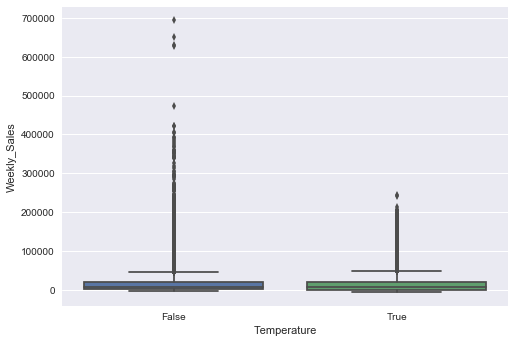

In [96]:
sns.boxplot(x=features_train['Temperature']>70,y=features_train['Weekly_Sales'])
plt.figure(figsize=(15,200))
#sns.boxplot(x=train['Pclass'],y=train['Age'])

In [97]:
plt.figure(figsize=(10,12))
features_train['Temperature'].iplot(kind='hist')

ValueError: not enough values to unpack (expected 2, got 1)

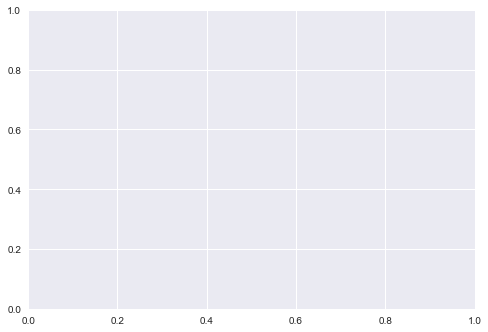

In [98]:
sns.heatmap(features_train.isnull().sum(axis=1),yticklabels=False)



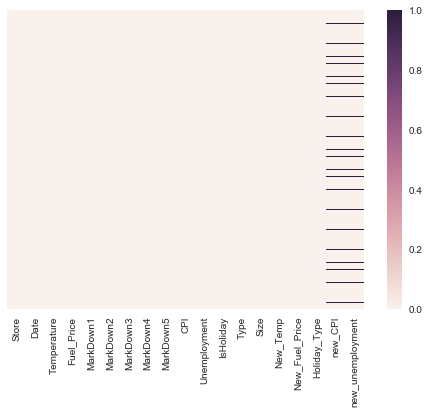

In [99]:
sns.heatmap(store_features.isnull(),yticklabels=False)

In [ ]:
store_features.head(2)

In [ ]:
features_train.head(2)

# look at some plots
boxplot(Weekly_Sales~Type)
boxplot(Weekly_Sales~Temperature>70)
hist(Temperature)
plot(CPI,Fuel_Price)
hist(Size)
hist(log(Weekly_Sales)

In [100]:
temp=store_features.replace('NULL',0)

# talk to Ryan about removing NUll for plotting

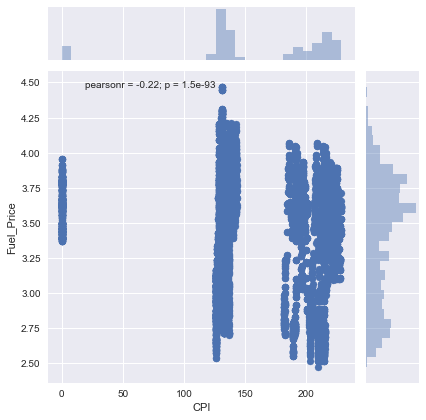

In [101]:
sns.jointplot(x=temp['CPI'].dropna(),y=temp['Fuel_Price'].dropna(),kind='scatter')

In [102]:
store_features['Type'].iplot(kind='hist')

In [ ]:
features_train['Weekly_Sales'].plot(kind='hist',log=True,bins=30)


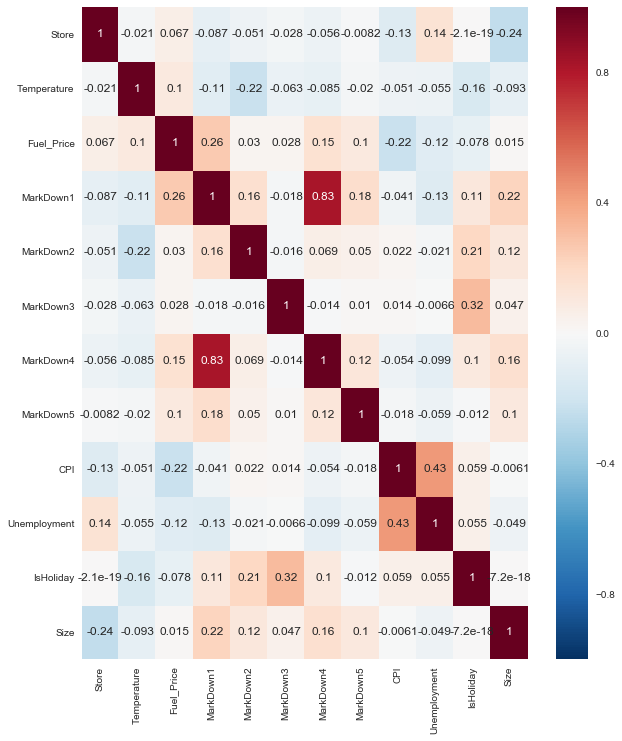

In [104]:
plt.figure(figsize=(10,12))
sns.heatmap(temp.corr(),annot=True)

KeyboardInterrupt: 

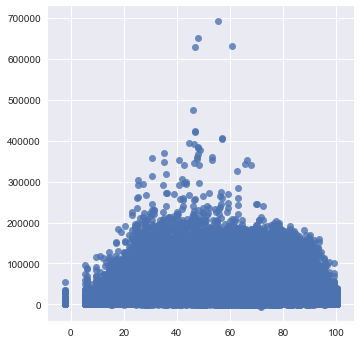

In [106]:
sns.lmplot(x='Temperature',y='Weekly_Sales', data=features_train, palette=None)

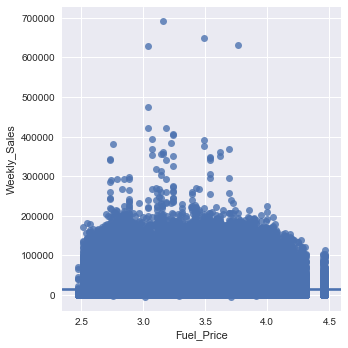

In [107]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales', data=features_train, palette=None)

In [ ]:
sns.lmplot(x='CPI',y='Unemployment', data=features_train, palette=None)

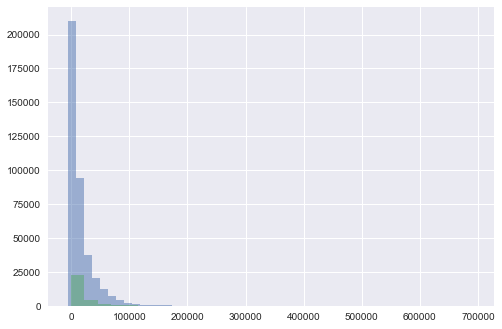

In [152]:
features_train[features_train['IsHoliday']==0]['Weekly_Sales'].hist(alpha=0.5,bins=30,label='Not a Holiday')
features_train[features_train['IsHoliday']==1]['Weekly_Sales'].hist(alpha=0.5,bins=30,label='Holiday')
# rescale y variable- y = y/some constant, normalize= True
#Highly skewe


In [ ]:
#plt.figure(figsize=(10,6))
#sns.countplot(x='Weekly_Sales',data=features_train,hue='Holiday_Type')


03/23/2017 work

In [109]:
features_train=features_train.reset_index()
features_train.head(4)

Date  Store  Dept  Temperature  Fuel_Price MarkDown1 MarkDown2  \
0  2010-02-05      1     1        42.31       2.572      NULL      NULL   
1  2010-02-05      1     2        42.31       2.572      NULL      NULL   
2  2010-02-05      1     3        42.31       2.572      NULL      NULL   
3  2010-02-05      1     4        42.31       2.572      NULL      NULL   

  MarkDown3 MarkDown4 MarkDown5       ...        Unemployment IsHoliday  \
0      NULL      NULL      NULL       ...               8.106         0   
1      NULL      NULL      NULL       ...               8.106         0   
2      NULL      NULL      NULL       ...               8.106         0   
3      NULL      NULL      NULL       ...               8.106         0   

   Weekly_Sales   New_Temp New_Fuel_Price New_Weekly_Sales   Holiday_Type  \
0      24924.50  very cold            low           medium  SuperBowl Day   
1      50605.27  very cold            low             high  SuperBowl Day   
2      13740.12  very cold            low           medium  SuperBowl Day   
3      39954.04  very cold            low             high  SuperBowl Day   

  new_CPI new_unemployment new_weekly_sales  
0    high           medium            large  
1    high           medium            large  
2    high           medium           medium  
3    high           medium            large  

[4 rows x 21 columns]

In [110]:
store_features.head(4)

Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0      1  2010-02-05        42.31       2.572      NULL      NULL      NULL   
1      1  2010-02-12        38.51       2.548      NULL      NULL      NULL   
2      1  2010-02-19        39.93       2.514      NULL      NULL      NULL   
3      1  2010-02-26        46.63       2.561      NULL      NULL      NULL   

  MarkDown4 MarkDown5      CPI Unemployment  IsHoliday Type    Size  \
0      NULL      NULL  211.096        8.106          0    A  151315   
1      NULL      NULL  211.242        8.106          1    A  151315   
2      NULL      NULL  211.289        8.106          0    A  151315   
3      NULL      NULL   211.32        8.106          0    A  151315   

    New_Temp New_Fuel_Price   Holiday_Type new_CPI new_unemployment  
0  very cold            low  SuperBowl Day    high           medium  
1  very cold            low      Usual Day    high           medium  
2  very cold            low      Usual Day    high           medium  
3  very cold            low      Usual Day    high           medium

In [111]:
df=pd.merge(features_train,store_features, on =['Store','Date'])

In [112]:
df.head()

Date  Store  Dept  Temperature_x  Fuel_Price_x MarkDown1_x  \
0  2010-02-05      1     1          42.31         2.572        NULL   
1  2010-02-05      1     2          42.31         2.572        NULL   
2  2010-02-05      1     3          42.31         2.572        NULL   
3  2010-02-05      1     4          42.31         2.572        NULL   
4  2010-02-05      1     5          42.31         2.572        NULL   

  MarkDown2_x MarkDown3_x MarkDown4_x MarkDown5_x        ...            CPI_y  \
0        NULL        NULL        NULL        NULL        ...          211.096   
1        NULL        NULL        NULL        NULL        ...          211.096   
2        NULL        NULL        NULL        NULL        ...          211.096   
3        NULL        NULL        NULL        NULL        ...          211.096   
4        NULL        NULL        NULL        NULL        ...          211.096   

  Unemployment_y  IsHoliday_y  Type    Size New_Temp_y New_Fuel_Price_y  \
0          8.106            0     A  151315  very cold              low   
1          8.106            0     A  151315  very cold              low   
2          8.106            0     A  151315  very cold              low   
3          8.106            0     A  151315  very cold              low   
4          8.106            0     A  151315  very cold              low   

  Holiday_Type_y new_CPI_y new_unemployment_y  
0  SuperBowl Day      high             medium  
1  SuperBowl Day      high             medium  
2  SuperBowl Day      high             medium  
3  SuperBowl Day      high             medium  
4  SuperBowl Day      high             medium  

[5 rows x 38 columns]

In [113]:
df_1 = df.groupby('Store')[['Weekly_Sales']].sum()

# find the 10 largest ethnic groups, by population
df_1=df_1.sort( columns='Weekly_Sales', ascending=False).head(10)
#total.reset_index()
df_1=df_1.reset_index()
df_1


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



Store  Weekly_Sales
0     20  3.013978e+08
1      4  2.995440e+08
2     14  2.889999e+08
3     13  2.865177e+08
4      2  2.753824e+08
5     10  2.716177e+08
6     27  2.538559e+08
7      6  2.237561e+08
8      1  2.224028e+08
9     39  2.074455e+08

In [114]:

import cufflinks as cf
import pandas as pd

cf.set_config_file(world_readable=True,offline=False)

In [115]:
df_1.iplot(kind='pie',labels='Store',values='Weekly_Sales')

Lets try to answer these questions. Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? which input variable has impact on what you are trying to predict- Weekly sales in this case

In [ ]:
df.head()

In [116]:
df.groupby('Type')[['Weekly_Sales']].sum()


Weekly_Sales
Type              
A     4.331015e+09
B     2.000701e+09
C     4.055035e+08

In [117]:
df_1=df[df['Type']=='A']
df_1.head()

Date  Store  Dept  Temperature_x  Fuel_Price_x MarkDown1_x  \
0  2010-02-05      1     1          42.31         2.572        NULL   
1  2010-02-05      1     2          42.31         2.572        NULL   
2  2010-02-05      1     3          42.31         2.572        NULL   
3  2010-02-05      1     4          42.31         2.572        NULL   
4  2010-02-05      1     5          42.31         2.572        NULL   

  MarkDown2_x MarkDown3_x MarkDown4_x MarkDown5_x        ...            CPI_y  \
0        NULL        NULL        NULL        NULL        ...          211.096   
1        NULL        NULL        NULL        NULL        ...          211.096   
2        NULL        NULL        NULL        NULL        ...          211.096   
3        NULL        NULL        NULL        NULL        ...          211.096   
4        NULL        NULL        NULL        NULL        ...          211.096   

  Unemployment_y  IsHoliday_y  Type    Size New_Temp_y New_Fuel_Price_y  \
0          8.106            0     A  151315  very cold              low   
1          8.106            0     A  151315  very cold              low   
2          8.106            0     A  151315  very cold              low   
3          8.106            0     A  151315  very cold              low   
4          8.106            0     A  151315  very cold              low   

  Holiday_Type_y new_CPI_y new_unemployment_y  
0  SuperBowl Day      high             medium  
1  SuperBowl Day      high             medium  
2  SuperBowl Day      high             medium  
3  SuperBowl Day      high             medium  
4  SuperBowl Day      high             medium  

[5 rows x 38 columns]

In [118]:
df_2=df[df['Type']=='B']
df_2.head()

Date  Store  Dept  Temperature_x  Fuel_Price_x MarkDown1_x  \
20482  2010-02-05      3     1          45.71         2.572        NULL   
20483  2010-02-05      3     2          45.71         2.572        NULL   
20484  2010-02-05      3     3          45.71         2.572        NULL   
20485  2010-02-05      3     4          45.71         2.572        NULL   
20486  2010-02-05      3     5          45.71         2.572        NULL   

      MarkDown2_x MarkDown3_x MarkDown4_x MarkDown5_x        ...          \
20482        NULL        NULL        NULL        NULL        ...           
20483        NULL        NULL        NULL        NULL        ...           
20484        NULL        NULL        NULL        NULL        ...           
20485        NULL        NULL        NULL        NULL        ...           
20486        NULL        NULL        NULL        NULL        ...           

         CPI_y Unemployment_y  IsHoliday_y  Type   Size New_Temp_y  \
20482  214.425          7.368            0     B  37392  very cold   
20483  214.425          7.368            0     B  37392  very cold   
20484  214.425          7.368            0     B  37392  very cold   
20485  214.425          7.368            0     B  37392  very cold   
20486  214.425          7.368            0     B  37392  very cold   

      New_Fuel_Price_y Holiday_Type_y new_CPI_y new_unemployment_y  
20482              low  SuperBowl Day      high             medium  
20483              low  SuperBowl Day      high             medium  
20484              low  SuperBowl Day      high             medium  
20485              low  SuperBowl Day      high             medium  
20486              low  SuperBowl Day      high             medium  

[5 rows x 38 columns]

In [119]:
df_3=df[df['Type']=='C']
df_3.head()

Date  Store  Dept  Temperature_x  Fuel_Price_x MarkDown1_x  \
286548  2010-02-05     30     1          39.05         2.572        NULL   
286549  2010-02-05     30     2          39.05         2.572        NULL   
286550  2010-02-05     30     3          39.05         2.572        NULL   
286551  2010-02-05     30     4          39.05         2.572        NULL   
286552  2010-02-05     30     5          39.05         2.572        NULL   

       MarkDown2_x MarkDown3_x MarkDown4_x MarkDown5_x        ...          \
286548        NULL        NULL        NULL        NULL        ...           
286549        NULL        NULL        NULL        NULL        ...           
286550        NULL        NULL        NULL        NULL        ...           
286551        NULL        NULL        NULL        NULL        ...           
286552        NULL        NULL        NULL        NULL        ...           

          CPI_y Unemployment_y  IsHoliday_y  Type   Size New_Temp_y  \
286548  210.753          8.324            0     C  42988  very cold   
286549  210.753          8.324            0     C  42988  very cold   
286550  210.753          8.324            0     C  42988  very cold   
286551  210.753          8.324            0     C  42988  very cold   
286552  210.753          8.324            0     C  42988  very cold   

       New_Fuel_Price_y Holiday_Type_y new_CPI_y new_unemployment_y  
286548              low  SuperBowl Day      high             medium  
286549              low  SuperBowl Day      high             medium  
286550              low  SuperBowl Day      high             medium  
286551              low  SuperBowl Day      high             medium  
286552              low  SuperBowl Day      high             medium  

[5 rows x 38 columns]

In [120]:
#df_1.info()
df_1['Holiday_Type_y'].unique()
#df_1['Weekly_Sales'].iplot(kind='hist')
#store_features['Type'].iplot(kind='hist')

array(['SuperBowl Day', 'Usual Day', 'Before Labour Day', 'Labour Day',
       'Before Thanksgiving', 'Thanksgiving', 'Before Christmas',
       'Christmas', 'Before SuperBowl Day'], dtype=object)

In [121]:
pd.to_datetime(df_1['Date']).head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [122]:
#df_1['Weekly_Sales'].iplot(kind='hist')
df_1[(df_1['Holiday_Type_y']=='SuperBowl Day')][['Weekly_Sales']].iplot(kind='hist')

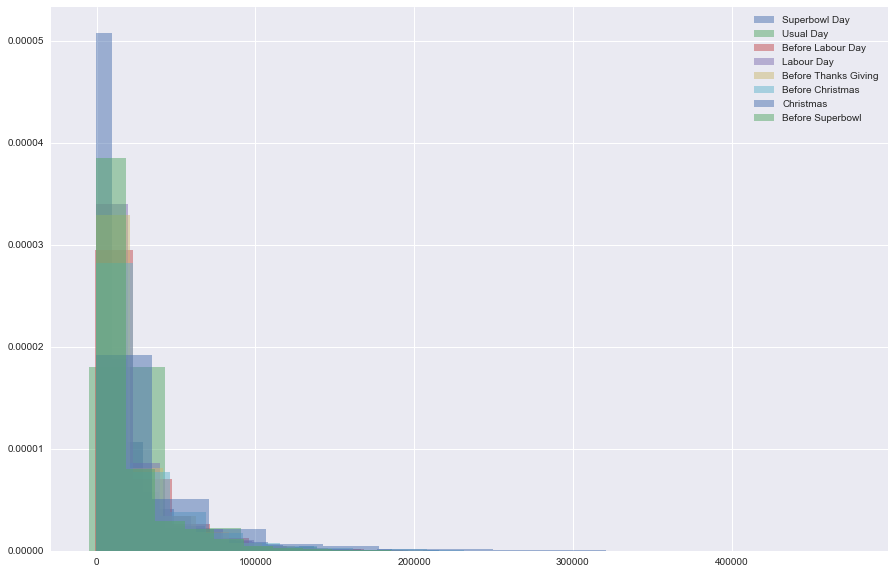

In [174]:
plt.figure(figsize=(15,10))
df_1[(df_1['Holiday_Type_y']=='SuperBowl Day')]['Weekly_Sales'].hist(alpha=0.5,bins=30,label='Superbowl Day',normed=1)
df_1[(df_1['Holiday_Type_y']=='Usual Day')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Usual Day',normed=1)
df_1[(df_1['Holiday_Type_y']=='Before Labour Day')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Before Labour Day',normed=1)
df_1[(df_1['Holiday_Type_y']=='Labour Day')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Labour Day',normed=1)
df_1[(df_1['Holiday_Type_y']=='Before Thanksgiving')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Before Thanks Giving',normed=1)
df_1[(df_1['Holiday_Type_y']=='Before Christmas')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Before Christmas',normed=1)
df_1[(df_1['Holiday_Type_y']=='Christmas')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Christmas',normed=1)
df_1[(df_1['Holiday_Type_y']=='Before SuperBowl Day')]['Weekly_Sales'].hist(alpha=0.5,bins=10,label='Before Superbowl',normed=1)
plt.legend(loc='upper right')
plt.show()

In [123]:
def ecdf(p):
    n=len(p)
    x=np.sort(p)
    y=np.arange(1,n+1)/n
    return x,y



In [124]:
x_ver,y_ver=ecdf(df['Weekly_Sales'])

Lets find covarience between the variables

In [125]:
np.cov(df['Temperature_x'],df['Weekly_Sales'])



array([[  3.40326164e+02,  -9.68855983e+02],
       [ -9.68855983e+02,   5.15797857e+08]])

Calcualte Pearson correlation

In [126]:
x=np.corrcoef(df['Temperature_x'],df['Weekly_Sales'])
x[0,1]

-0.0023124470102593745

In [127]:
np.cov(df['Fuel_Price_x'],df['Weekly_Sales'])

array([[  2.10235581e-01,  -1.25268657e+00],
       [ -1.25268657e+00,   5.15797857e+08]])

In [128]:
x=np.corrcoef(df['Fuel_Price_x'],df['Weekly_Sales'])
x[0,1]

-0.00012029554499577843

In [129]:
np.cov(df['IsHoliday_y'],df['Weekly_Sales'])

array([[  6.54082697e-02,   7.41977099e+01],
       [  7.41977099e+01,   5.15797857e+08]])

In [130]:
x=np.corrcoef(df['IsHoliday_y'],df['Weekly_Sales'])
x[0,1]

# dont do this, use a T test- Both the variables should be continuous


0.012774220374854791

In [131]:
np.cov(df['Size'],df['Weekly_Sales'])

array([[  3.71863154e+09,   3.37687437e+08],
       [  3.37687437e+08,   5.15797857e+08]])

In [132]:
x=np.corrcoef(df['Size'],df['Weekly_Sales'])
x[0,1]

0.24382799226304344

Lets do Linear regression of the variables using Least square

In [133]:
slope,intercept=np.polyfit(df['Temperature_x'],df['Weekly_Sales'],1)

In [134]:
slope

-2.8468454271697801

In [135]:
intercept

16152.325232389096

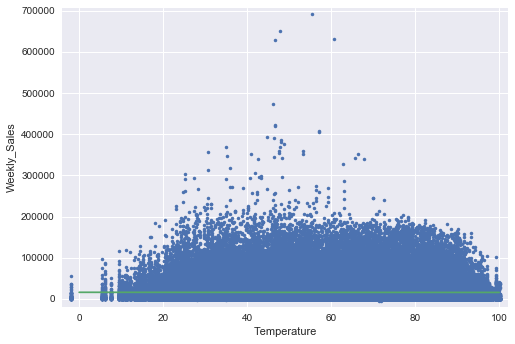

In [136]:
plt.plot(df['Temperature_x'],df['Weekly_Sales'],marker='.',linestyle='none')
plt.margins(0.02)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
x=np.array([0,100])
y=slope*x+intercept
plt.plot(x,y)


slope = -5.95848981364 slope
intercept = 16001.2847658 intercept


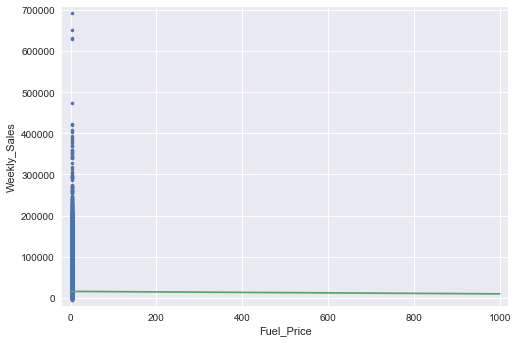

In [137]:
# Plot the Fuel_Price_x  versus Weekly_Sales
plt.plot(df['Fuel_Price_x'],df['Weekly_Sales'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Fuel_Price')
_ = plt.ylabel('Weekly_Sales')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df['Fuel_Price_x'],df['Weekly_Sales'],1)

# Print the results to the screen
print('slope =', a, 'slope')
print('intercept =', b, 'intercept')

# Make theoretical line to plot
x = np.array([0,1000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)




slope = 0.0908095983536 slope
intercept = 3565.0510115 intercept


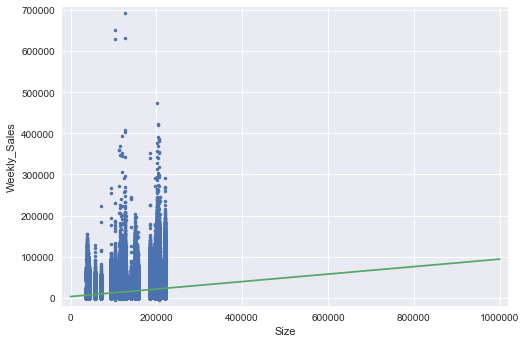

In [138]:
# Plot the Fuel_Price_x  versus Weekly_Sales
plt.plot(df['Size'],df['Weekly_Sales'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Size')
_ = plt.ylabel('Weekly_Sales')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df['Size'],df['Weekly_Sales'],1)

# Print the results to the screen
print('slope =', a, 'slope')
print('intercept =', b, 'intercept')

# Make theoretical line to plot
x = np.array([0,1000000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)


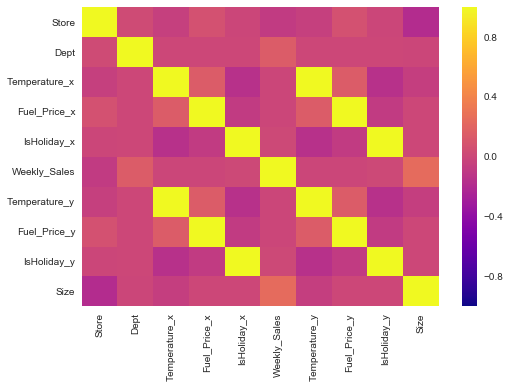

In [139]:
sns.heatmap(df.corr(),cmap='plasma')